In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
plt.rcParams["figure.figsize"] =(10,5)
plt.rcParams['figure.dpi'] = 150

In [26]:
len_dia = pd.DataFrame(columns= ['Length(cm)','Diameter(cm)'])

In [27]:
len_dia['Length(cm)'] = [9.5, 10.0, 10.5, 12.0, 13.0, 14.0, 15.0]
len_dia['Diameter(cm)'] = [4.8, 5.0, 5.3, 5.4, 5.5, 6.6, 6.8]

In [28]:
len_dia['Length(cm)'] = len_dia['Length(cm)'] +0.7

In [29]:
len_dia['aperture'] = np.sin(np.arctan(len_dia['Diameter(cm)']/(2*len_dia['Length(cm)'])))
len_dia['aperture'] = round(len_dia['aperture'],2)

In [30]:
len_dia

,Length(cm),Diameter(cm),aperture
0,10.2,4.8,0.23
1,10.7,5.0,0.23
2,11.2,5.3,0.23
3,12.7,5.4,0.21
4,13.7,5.5,0.20
5,14.7,6.6,0.22
6,15.7,6.8,0.21


In [31]:
round(np.mean(len_dia['aperture']),2)

0.22

In [32]:
len_dia['aperture']

0    0.23
1    0.23
2    0.23
3    0.21
4    0.20
5    0.22
6    0.21
Name: aperture, dtype: float64

## Single Mode

In [33]:
readings = pd.DataFrame()
Least_Count_Main_Scale = 2 # Degree
Least_Count_Vernier_Scale = 0.2
readings['Angle (degree)'] =  np.array([ 70.4, 74.6, 75.6, 76.6, 77.0, 77.2, 77.4, 78.4, 78.8, 79.0, 80.0, 80.6, 80.8, 81.0, 81.6, 81.8, 82.0, 82.6, 82.8, 83.0, 83.2,
                               83.4, 83.6, 84.0, 84.2, 84.6, 85.6, 86.4, 87.0, 87.4, 88.0, 88.6, 90.4, 90.6 ,90.8, 92.8, 93.6, 94.0 ]) 
readings['Scaled Angle (degree)'] = readings['Angle (degree)'] -    82
error_in_current = 0.8
readings['Current (micro-Amp)'] =  np.array([ 1, 8.9, 19.3, 42.3, 55.9, 71.4, 82, 102, 199.3, 301.6, 598, 903, 1001, 1206, 1405.4, 1503.2, 1610, 1496, 1398.4, 1301.2, 1195, 1104, 1003, 889.3, 800.3, 602, 298.7, 105, 71, 50, 41, 22.3, 10, 5.2, 3.5, 1.6, 1.0, 0.9 ]) - error_in_current

In [34]:
readings

,Angle (degree),Scaled Angle (degree),Current (micro-Amp)
0,70.4,-11.6,0.2
1,74.6,-7.4,8.1
2,75.6,-6.4,18.5
3,76.6,-5.4,41.5
4,77.0,-5.0,55.1
5,77.2,-4.8,70.6
6,77.4,-4.6,81.2
7,78.4,-3.6,101.2
8,78.8,-3.2,198.5
9,79.0,-3.0,300.8


In [35]:
from scipy.optimize import curve_fit
def gaussian_fit(x, a, mean, sigma):
    return a*np.exp(-((x-mean)**2)/(2*sigma**2))

In [36]:
pcoe, pcov = curve_fit(gaussian_fit, readings['Scaled Angle (degree)'], readings['Current (micro-Amp)'], p0=[1, 1, 1])

In [37]:
print('mean: ',pcoe[1])
print('standard deviation: ',pcoe[2])

mean:  0.20977149957389707
standard deviation:  1.7128185309197315


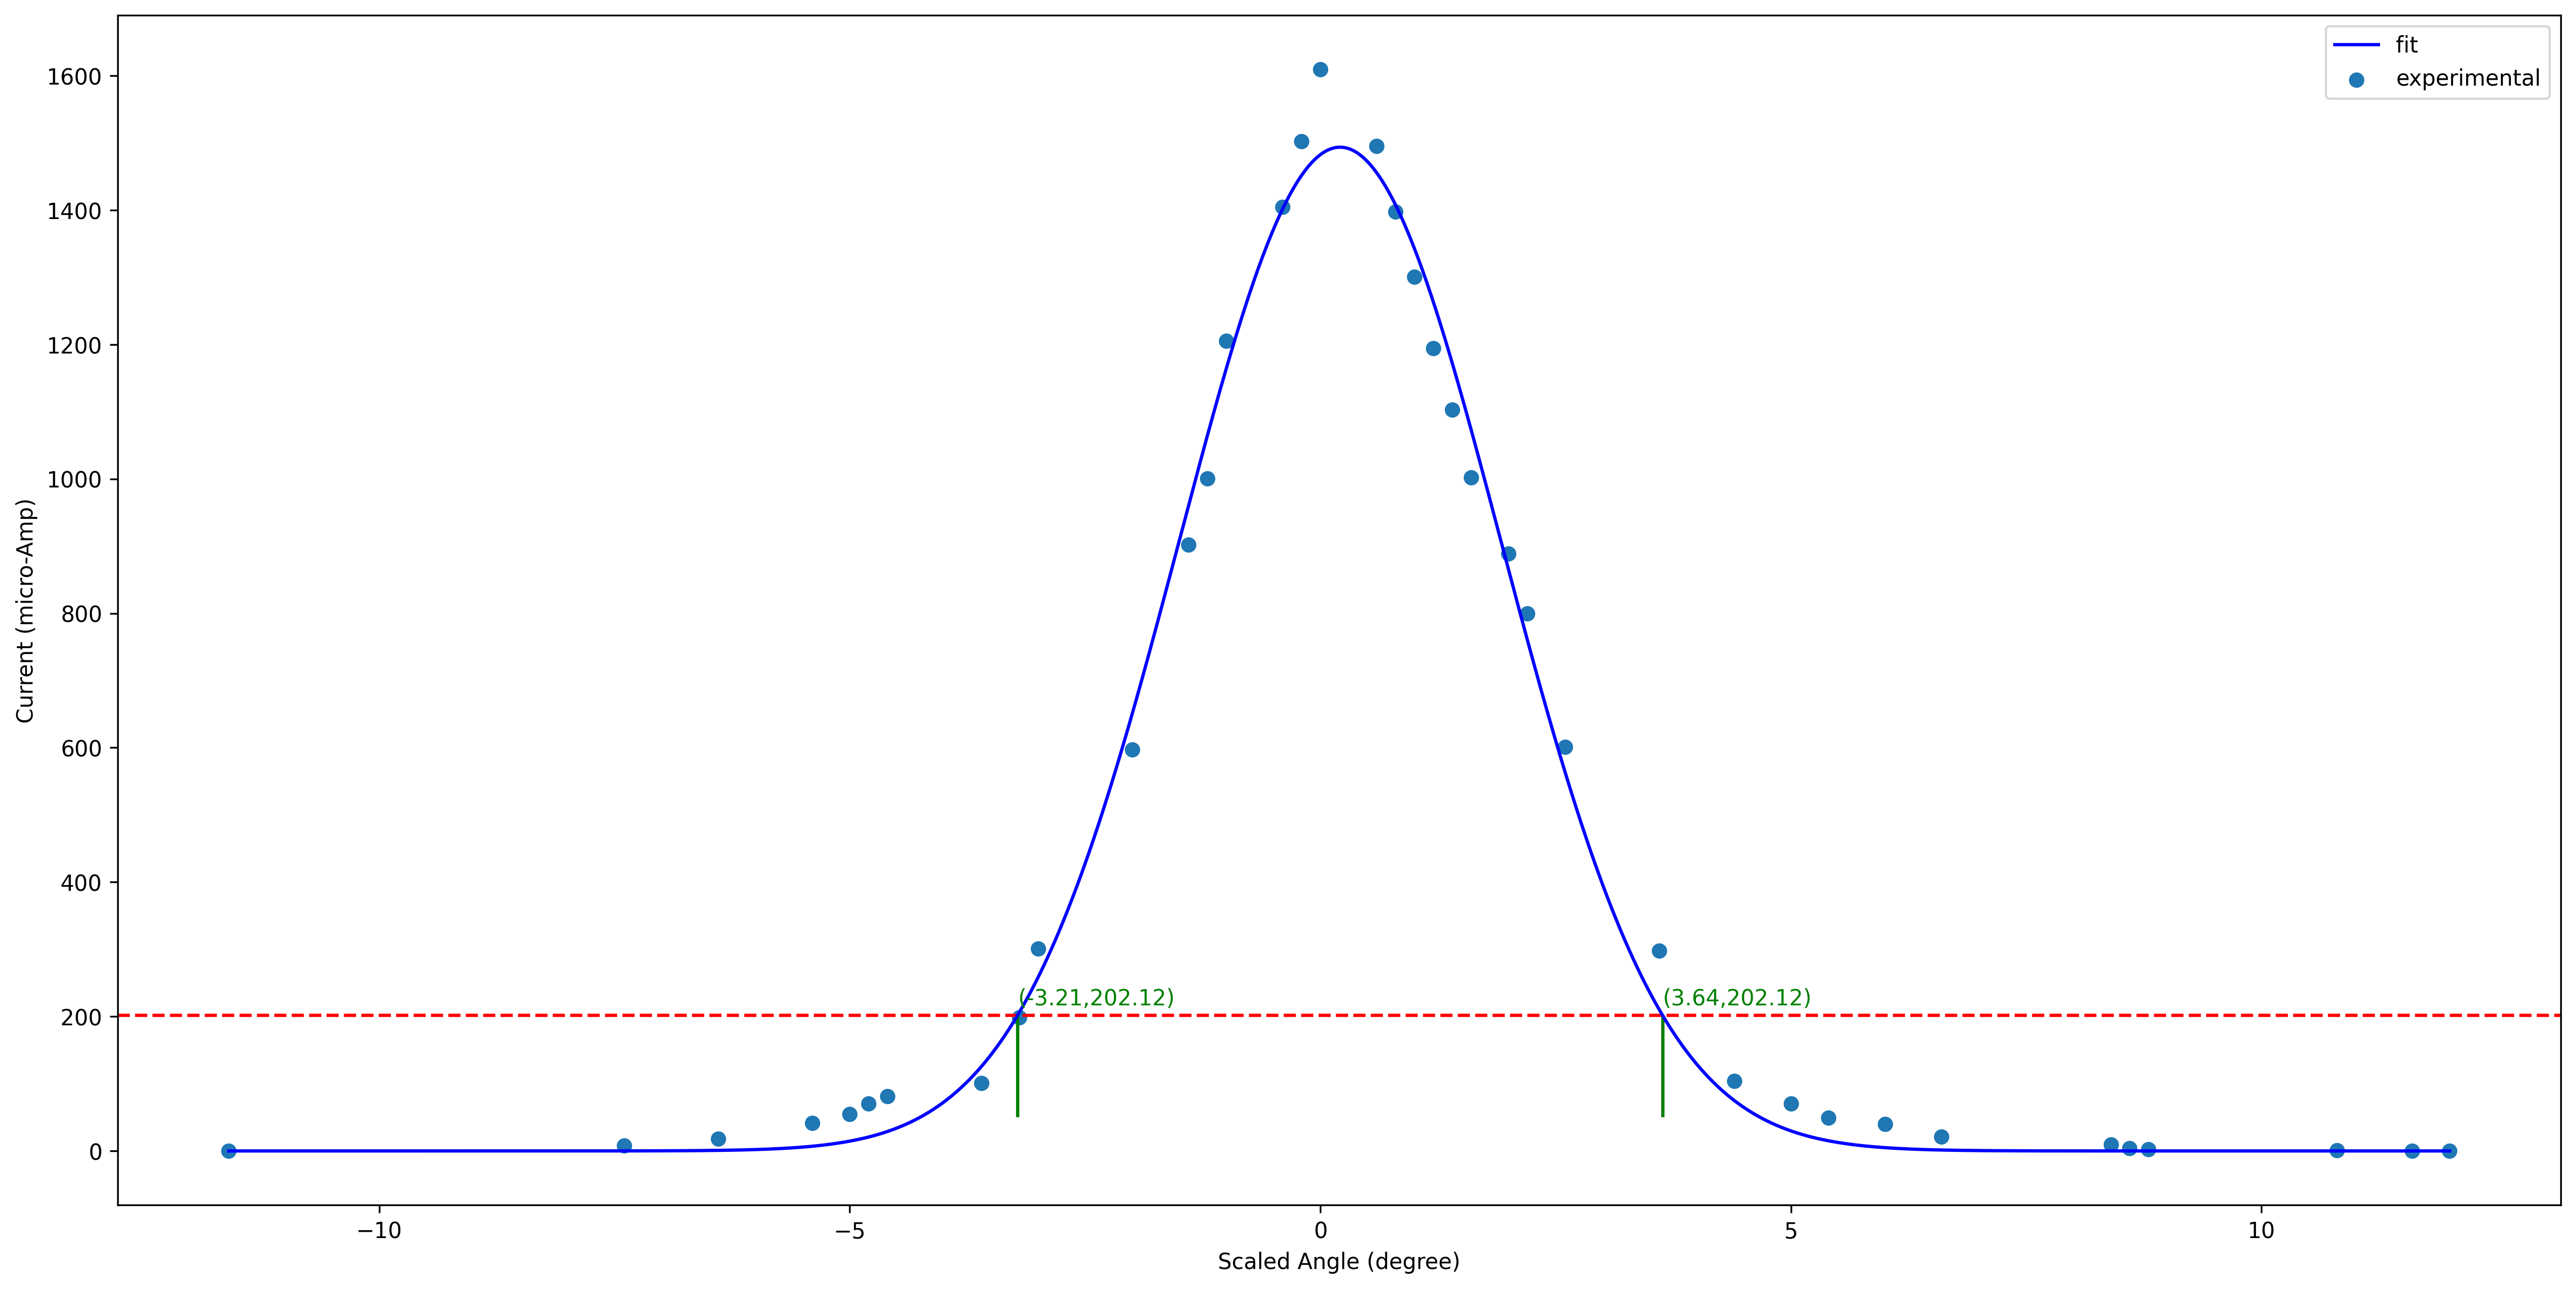

In [38]:
plt.figure(figsize=(20,10),dpi=300)

x = np.linspace(readings['Scaled Angle (degree)'].min(), readings['Scaled Angle (degree)'].max(), 1000)
y = gaussian_fit(x, *pcoe)


y_max = y.max()
#y_cut = y_max*(1/(np.exp(2)))
y_cut = y_max/np.exp(1)**2     # 5%
plt.axhline(y = y_cut, color = 'r', linestyle = '--')

x_max = x[np.argmax(y)]
x1 = x_max - 2*pcoe[2]
x2 = x_max + 2*pcoe[2]


#  finding x1 and x2 #################################################################################
# y_8 = [i for i in y if round(i,-1)==round(y_cut,-1)]

# x_values = []
# for ind,val in enumerate(y):
#     if val in y_8:
#         x_values.append(x[ind])

# x1 = np.mean(x_values[:4])
# x2 = np.mean(x_values[4:])
######################################################################################################


plt.vlines(x = x1, ymin = 50, ymax = y_cut, colors = 'green')
plt.vlines(x = x2, ymin = 50, ymax = y_cut, colors = 'green')


plt.plot(x, y, 'b-', label='fit')
plt.annotate("("+str(np.round(x1,2))+","+str(np.round(y_cut,2))+")", xy=(x1, y_cut+15),  color = 'green')
plt.annotate("("+str(np.round(x2,2))+","+str(np.round(y_cut,2))+")", xy=(x2, y_cut+15),  color = 'green')

plt.scatter(readings['Scaled Angle (degree)'], readings['Current (micro-Amp)'], label='experimental')
plt.xlabel('Scaled Angle (degree)')
plt.ylabel('Current (micro-Amp)')
plt.legend();

In [39]:
x1 = x_max - 2*pcoe[2]
x2 = x_max + 2*pcoe[2]
print(x1,x2)

-3.213825250027648 3.637448873651278


In [40]:
np.mean([-1*x1,x2])

3.425637061839463